In [1]:
# We begin with a spectrum
from pyFIT3D.common.io import read_spectra

name = 'NGC5947'
spec_file = f'{name}.spec_5.txt'

wave__w, flux__w, eflux__w = read_spectra(spec_file, f_error=lambda f: f*0.1)

Text(0, 0.5, 'flux')

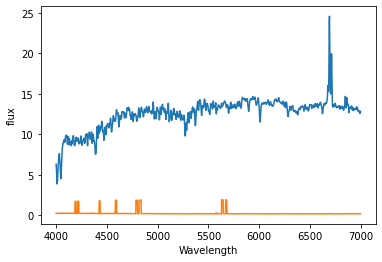

In [2]:
# plot spectrum
import numpy  as np
import matplotlib.pyplot as plt

# select a wavelength range to show
sel__w = (wave__w > 4000) & (wave__w < 7000)

# plot spectrum and error spectrum
plt.plot(wave__w[sel__w], flux__w[sel__w])
plt.plot(wave__w[sel__w], eflux__w[sel__w])
# label axes
plt.xlabel('Wavelength')
plt.ylabel('flux')

# SSP Analysis with auto_ssp_elines_rnd()

In [3]:
#########################################################################
#
# --= pyFIT3D Auto SSP analysis =--
#
# Let's run the analysis of the central (5"x5") spectra of galaxy NGC5947
#
from pyFIT3D.common.auto_ssp_tools import auto_ssp_elines_single_main
from pyFIT3D.common.io import remove_isfile

# See the similar script to run the analysis with intrumental dispersion: 
#      bin/auto_ssp_elines_rnd_sigma_inst.py
#

# using the initial values:
#
# Instrumental dispersion: 2.6 AA
sigma_inst = 2.6

# Masks:
#     File with list of ranges of wavelength to be masked in whole analysis
mask_list = 'mask_elines.txt'

######################
######################
# Non linear analysis: (redshift, observed dispersion and dust attenuation)
#     wavelength range: 
#         [3800, 4700] AA for the redshift and sigma analysis
#         [3800, 7000] AA for the dust attenuation
w_min_max = [3800, 7000]
nl_w_min_max = [3800, 4700]

#     models:
#         Miles solar 3 models
ssp_nl_fit_file = 'gsd01_3.fits'

#     emission lines to be masked:
elines_mask_file = 'emission_lines.txt'

#     redshift:
#         initial value: 0.0195
#                 delta: 0.0001
#                   min: 0.0170
#                   max: 0.0225
redshift_set = [0.0195, 0.0001, 0.0170, 0.0225]

#     dispersion: (km/s)
#         initial value: 30
#                 delta: 10
#                   min: 1
#                   max: 350
sigma_set = [30, 10, 1, 350]

#     dust attenuation at V band (mag):
#         initial value: 0.1
#                 delta: 0.05
#                   min: 0
#                   max: 2
AV_set = [0.1, 0.05, 0, 2]

# SSP analysis:
#     wavelength range: 
#         [3800, 7000] AA
#
#     models:
#         GSD01 156 models
ssp_file = 'gsd01_156.fits'

#     configuration file: among other things, will configure
#                         which emission lines systems pyFIT3D
#                         will fit.
config_file = 'auto_ssp.config'

# final output file:
out_file = f'auto_ssp.{name}.cen.out'
out_file_elines = 'elines_' + out_file
out_file_coeffs = 'coeffs_' + out_file
out_file_fit = 'output.' + out_file + '.fits'
remove_isfile(out_file)
remove_isfile(out_file_elines)
remove_isfile(out_file_coeffs)
remove_isfile(out_file_fit)

# run auto_ssp_elines_rnd_sigma_inst
cf, SPS = auto_ssp_elines_single_main(
    wave__w, flux__w, eflux__w,
    
    ssp_file=ssp_file, 
    ssp_nl_fit_file=ssp_nl_fit_file, 
    
    sigma_inst=sigma_inst, 
    
    out_file=out_file, 
    config_file=config_file, 
    
    mask_list=mask_list, 
    elines_mask_file=elines_mask_file, 
    
    min=-3, max=50, 
    
    w_min=w_min_max[0], w_max=w_min_max[1], 
    nl_w_min=nl_w_min_max[0], nl_w_max=nl_w_min_max[1], 
    
    input_redshift=redshift_set[0], delta_redshift=redshift_set[1], min_redshift=redshift_set[2], max_redshift=redshift_set[3], 
    input_sigma=sigma_set[0], delta_sigma=sigma_set[1], min_sigma=sigma_set[2], max_sigma=sigma_set[3], 
    input_AV=AV_set[0], delta_AV=AV_set[1], min_AV=AV_set[2], max_AV=AV_set[3], 
    
    plot=0
)

# output files
SPS.output_gas_emission(filename=out_file_elines)
SPS.output_fits(filename=out_file_fit)
SPS.output_coeffs_MC(filename=out_file_coeffs)
SPS.output(filename=out_file, block_plot=False)

---[ StPopSynt ]----------------------------------------------------------
| Input config: 
| - MIN_DELTA_CHI_SQ = 0.0001
| - MAX_N_ITER = 1
| - CUT_MEDIAN_FLUX = 0.0
| - Wavelength range - [3800.00, 7000.00] - Non-linear analysis: [3800.00, 4700.00]
| - Instrumental dispersion: 2.6
| - Redshift - guess:0.019500 delta:0.000100 min:0.017000 max:0.022500
| - Sigma    - guess:30.000000 delta:10.000000 min:1.000000 max:350.000000
| - AV       - guess:0.100000 delta:0.050000 min:0.000000 max:2.000000
--------------------------------------------------------------------------
| Emission lines analysis:
| - Number of systems = 6
| - wavelength range: 6530-6750 - config file: Ha_NII.config
| - wavelength range: 4800-5200 - config file: OIII_V500.config
| - wavelength range: 6730-6950 - config file: SII_V500.config
| - wavelength range: 4310-4500 - config file: Hg_V500.config
| - wavelength range: 4095-4250 - config file: Hd_V500.config
| - wavelength range: 3700-3900 - config file: OII_V500.con

In [4]:
# Now we have the result of the fit inside the variable SPS
# Non-linear part (redshift, sigma and AV results) 
# Example: 
print(f'best redshift: {SPS.best_redshift:.4f} +/- {SPS.e_redshift:.4f}')
print(f'best sigma   : {SPS.best_sigma:.4f} +/- {SPS.e_sigma:.4f} ')
print(f'best AV      : {SPS.best_AV:.4f} +/- {SPS.e_AV:.4f}')

best redshift: 0.0197 +/- 0.0000
best sigma   : 148.3214 +/- 1.0249 
best AV      : 0.3063 +/- 0.0713


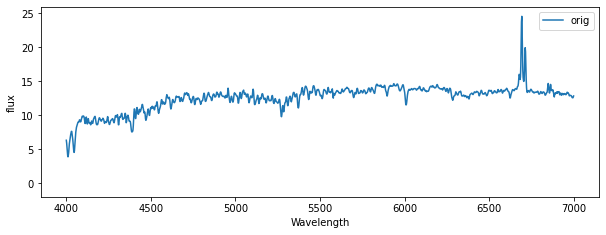

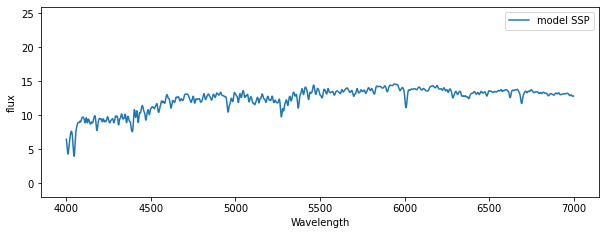

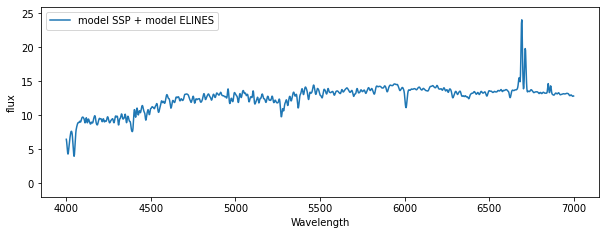

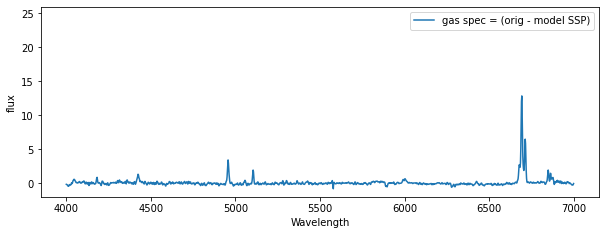

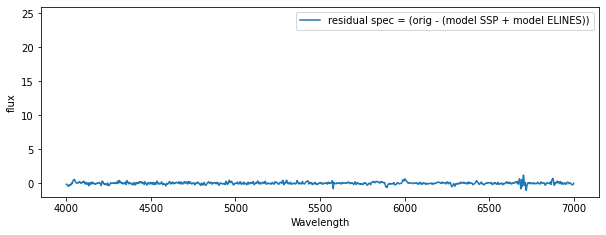

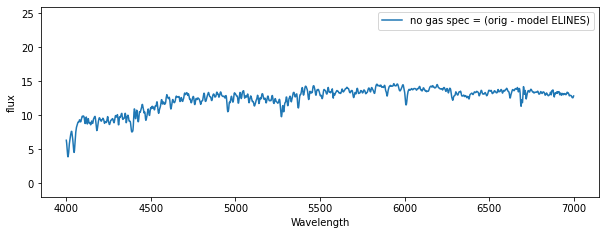

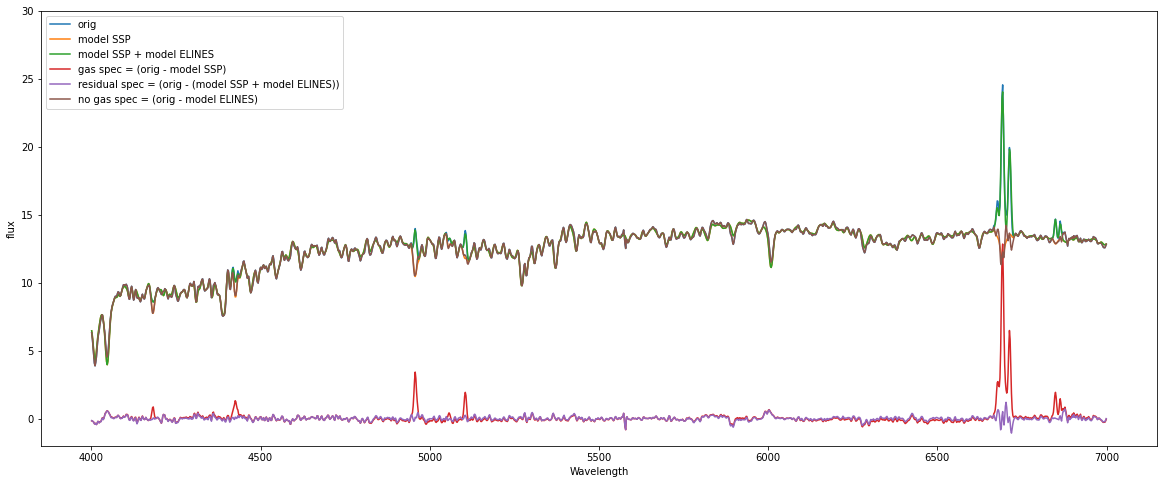

In [5]:
# Inspect output spectra
sp_keys = ['orig', 'model SSP', 'model SSP + model ELINES', 'gas spec = (orig - model SSP)', 'residual spec = (orig - (model SSP + model ELINES))', 'no gas spec = (orig - model ELINES)']
org_wave__w = SPS.spectra['raw_wave']
sel__w = (org_wave__w > 4000) & (org_wave__w < 7000)
for i in range(len(sp_keys)):
    f = plt.figure()
    f.set_size_inches(10, 3.5)
    ax = f.gca()
    sp = sp_keys[i]
    ax.plot(org_wave__w[sel__w], SPS.output_spectra_list[i][sel__w], label=sp)
#     for j in range(i+1):
#         sp = sp_keys[j]
#         ax.plot(org_wave__w[sel__w], SPS.output_spectra_list[j][sel__w], label=sp, alpha=(j + 1)/(i + 1))
    ax.set_xlabel('Wavelength')
    ax.set_ylabel('flux')
    ax.set_ylim(-2, 26)
    ax.legend()
f = plt.figure()
f.set_size_inches(20, 8)
for i in range(len(sp_keys)):
    ax = f.gca()
    sp = sp_keys[i]
    ax.plot(org_wave__w[sel__w], SPS.output_spectra_list[i][sel__w], label=sp)
    ax.set_xlabel('Wavelength')
    ax.set_ylabel('flux')
    ax.set_ylim(-2, 30)
    ax.legend()

## Let's fit the [NII] + H$\alpha$ system of emission lines

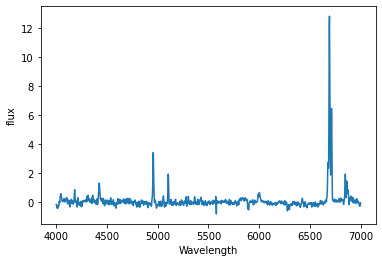

In [6]:
# Gas spectrum
gas__w = SPS.output_spectra_list[3]

plt.xlabel('Wavelength')
plt.ylabel('flux')
plt.plot(org_wave__w[sel__w], gas__w[sel__w])

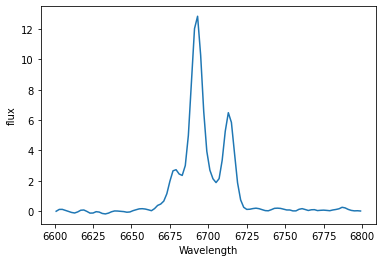

In [7]:
# [NII]+[Ha] system
wl_br = [6600, 6800]
wlb = wl_br[0]
wlr = wl_br[1]
sel__w = (wave__w > wlb) & (wave__w < wlr)
plt.xlabel('Wavelength')
plt.ylabel('flux')
plt.plot(org_wave__w[sel__w], gas__w[sel__w])

In [8]:
# The system velocity should be around:
from pyFIT3D.common.constants import __c__

obs_Ha_center = wave__w[sel__w][np.argmax(gas__w[sel__w])]
rest_Ha_center = 6562.82
sys_vel = __c__*(obs_Ha_center - rest_Ha_center)/rest_Ha_center
print(f'sys_vel: {sys_vel}')

sys_vel: 5946.678742132207


In [9]:
from pyFIT3D.common.stats import pdl_stats, _STATS_POS

system_wave__w = org_wave__w[sel__w]
system_flux__w = gas__w[sel__w]
# simulate an input error
system_res__w = SPS.output_spectra_list[4][sel__w]

st_res = pdl_stats(system_res__w)

In [10]:
#create noise with SN = 20
goal_SN = 50
noise = np.random.normal(0, system_flux__w.mean()/(2.*goal_SN), system_flux__w.size)
perturbed_flux__w = system_flux__w + noise
error__w = np.sqrt(np.abs(system_flux__w + 0.5*noise**2))

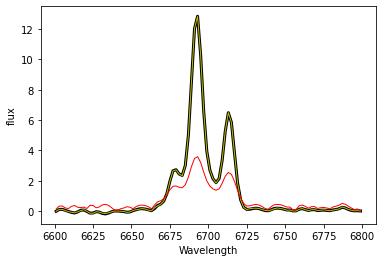

In [11]:
# [NII]+[Ha] system
plt.xlabel('Wavelength')
plt.ylabel('flux')
plt.plot(system_wave__w, system_flux__w, 'k-', lw=3)
plt.plot(system_wave__w, perturbed_flux__w, 'y-', lw=1)
plt.plot(system_wave__w, error__w, 'r-', lw=1)

# Fitting emission lines with fit_elines_main() using method RND + LM (run_mode='BOTH')

In [12]:
#####################################################################
#
# --= pyFIT3D fit elines analysis =--
#
# Let's fit the NII+Ha system in the previous spectra
import sys
import numpy as np
from pyFIT3D.common.gas_tools import fit_elines_main, ConfigEmissionModel

# models: Ha + [NII]6583 + [NII]6548 + continuum
#     config file with models to fit:
config_filename = 'Ha_NII.config'

cf = ConfigEmissionModel(config_filename)

# output filename 
output_filename = f'fit_elines_rnd_NII_Ha.{name}.out'

EL = fit_elines_main(
    wavelength=system_wave__w, 
    flux=system_flux__w,
    sigma_flux=error__w,
    config=cf,
    
    plot=0, 

    # number of Monte-Carlo loops emoployed on both redshift and sigma search
    n_MC=20, 
    # number of rounds trying to decrease the chi-square
    n_loops=5, 

    # help the integrated flux fit redefining the flux ranges
    redefine_max=True, max_factor=2, redefine_min=True, min_factor=0.01*1.2,
        
    # run_mode should be 'RND', 'LM' or 'BOTH'
    run_mode='BOTH',

    # guide the velocity of the emission lines using the
    # derived stellar redshift
    vel_guide=sys_vel, vel_mask=1, vel_fixed=1, vel_guide_half_range=100,

    # Fine search parameters
    fine_search=False, scale_ini=0.15,
)

guided...
6562.82 - guided vel = 5946.678742132207 (5846.6787, 6046.6787)
-> real number of loops = 112
-> number of models = 4 | chi^2 = 0.1329720779002742
         -------------------------------------------------------------------------------------------------
         |         wave          |         flux          |         sigma         |          vel          |
----------------------------------------------------------------------------------------------------------
|  eline | 6562.8200 +/-  0.0000 |  133.3541 +/- 10.8886 |    4.8810 +/-  0.4278 | 5879.4541 +/- 15.8968 |
|  eline | 6583.6000 +/-  0.0000 |   67.3829 +/-  7.2551 |    4.8810 +/-  0.4278 | 5879.4541 +/- 15.8968 |
|  eline | 6548.0000 +/-  0.0000 |   22.4385 +/-  6.5079 |    4.8810 +/-  0.4278 | 5879.4541 +/- 15.8968 |
----------------------------------------------------------------------------------------------------------
         |        coeff0         |
----------------------------------
| poly1d |    0.0096 +/-

In [13]:
# the final results are stored in EL.final_fit_params_mean (mean value) and EL.final_fit_params_std (stddev value)
models = EL.config.model_types
print(f'Number of models: {len(models)} - names: {models}')
for i_m, mod in enumerate(models):
    print(f'model index: {i_m} - name: {mod}')
    print(f'\tparameters: {EL.final_fit_params_mean[i_m]}')

Number of models: 4 - names: ['eline', 'eline', 'eline', 'poly1d']
model index: 0 - name: eline
	parameters: [6562.82    133.3541    4.881  5879.4541    0.        0.        0.        0.        0.    ]
model index: 1 - name: eline
	parameters: [6583.6      67.3829    4.881  5879.4541    0.        0.        0.        0.        0.    ]
model index: 2 - name: eline
	parameters: [6548.       22.4385    4.881  5879.4541    0.        0.        0.        0.        0.    ]
model index: 3 - name: poly1d
	parameters: [0.0096 0.     0.     0.     0.     0.     0.     0.     0.    ]


In [14]:
# with the help of the dictionary config._EL_MODELS 
# we can access the values of the employed models 
# by a key string.
for k, v in EL.config._EL_MODELS.items():
    print(f'model key: {k}')
    print(f'\tparameters keys and indexes: {v}')

print('')
# using the dictionary to access the Gaussian (model eline) models:
for i_m, mod in enumerate(models):
    if mod == 'eline':
        i_par_central_wavelength = EL.config._EL_MODELS['eline']['central_wavelength']
        i_par_flux = EL.config._EL_MODELS['eline']['flux']
        i_par_sigma = EL.config._EL_MODELS['eline']['sigma']
        i_par_v0 = EL.config._EL_MODELS['eline']['v0']
        print(f'model index: {i_m} - name: {mod} (central wl: {EL.final_fit_params_mean[i_m][i_par_central_wavelength]})')
        print(f'\tflux: {EL.final_fit_params_mean[i_m][i_par_flux]}', end=' - ')
        print(f'sigma: {EL.final_fit_params_mean[i_m][i_par_sigma]}', end=' - ')
        print(f'v0: {EL.final_fit_params_mean[i_m][i_par_v0]}')

print('')
# using dictionary to access the polynomials coefficients (poly1d)
i_model_poly1d = 3
print(f'model index: {i_m} - name: {models[i_m]}')
_sum = 0
for k, i_c in EL.config._EL_MODELS['poly1d'].items():
    coeff = EL.final_fit_params_mean[i_model_poly1d][i_c]
    e_coeff = EL.final_fit_params_std[i_model_poly1d][i_c]

    _int_mod = np.array([l**i_c for l in EL.wavelength]).sum()

    _sum += coeff*_int_mod
    
    if coeff != 0:
        print(f'\t{k}: {coeff} +/- {e_coeff}')
print(f'\tintegrated continuum: {_sum}')

model key: eline
	parameters keys and indexes: {'central_wavelength': 0, 'flux': 1, 'sigma': 2, 'v0': 3}
model key: poly1d
	parameters keys and indexes: {'coeff0': 0, 'coeff1': 1, 'coeff2': 2, 'coeff3': 3, 'coeff4': 4, 'coeff5': 5, 'coeff6': 6, 'coeff7': 7, 'coeff8': 8}

model index: 0 - name: eline (central wl: 6562.82)
	flux: 133.35406216669136 - sigma: 4.880995695748538 - v0: 5879.4540876933925
model index: 1 - name: eline (central wl: 6583.6)
	flux: 67.38287386519038 - sigma: 4.880995695748538 - v0: 5879.4540876933925
model index: 2 - name: eline (central wl: 6548.0)
	flux: 22.4384969971084 - sigma: 4.880995695748538 - v0: 5879.4540876933925

model index: 3 - name: poly1d
	coeff0: 0.009644053936361011 +/- 0.0175047056754331
	integrated continuum: 0.9644053936361011


In [15]:
from pyFIT3D.common.constants import __sigma_to_FWHM__

# we can build helper functions to get the parameters directly (all fluxes, all sigmas, etc...)
_mean_pars = EL.final_fit_params_mean
_std_pars = EL.final_fit_params_std
_cf = EL.config
eline_pars_dict = _cf._EL_MODELS['eline']
_pval = lambda par: np.array([_mean_pars[i][eline_pars_dict[par]] for i in range(_cf.n_models) if _cf.model_types[i] == 'eline'])
_epval = lambda par: np.array([_std_pars[i][eline_pars_dict[par]] for i in range(_cf.n_models) if _cf.model_types[i] == 'eline'])
print(f'examples:')
print(f'\t_pval(\'flux\') = {_pval("flux")}')
print(f'\t_epval(\'v0\') = {_epval("v0")}')

examples:
	_pval('flux') = [133.3541  67.3829  22.4385]
	_epval('v0') = [15.8968 15.8968 15.8968]


In [16]:
flux = _pval('flux')
e_flux = _epval('flux')
v0 = _pval('v0')
e_v0 = _epval('v0')
sigma = _pval('sigma')
e_sigma = _epval('sigma')
disp = __sigma_to_FWHM__*_pval('sigma')
e_disp = __sigma_to_FWHM__*_epval('sigma')

i_Ha = 0
i_NII_red = 1
i_NII_blue = 2

print(f'Ha:')
print(f"\t integrated flux: {flux[i_Ha]:.4f} +/- {e_flux[i_Ha]:.4f}")
print(f"\t        velocity: {v0[i_Ha]:.4f} +/- {e_v0[i_Ha]:.4f} km/s")
print(f"\t           sigma: {sigma[i_Ha]:.4f} +/- {e_sigma[i_Ha]:.4f}")
print(f"\t      dispersion: {disp[i_Ha]:.4f} +/- {e_disp[i_Ha]:.4f} [FWHM]")
print(f'[NII]6583:')
print(f"\t integrated flux: {flux[i_NII_red]:.4f} +/- {e_flux[i_NII_red]:.4f}")
print(f'[NII]6548')
print(f"\t integrated flux: {flux[i_NII_blue]:.4f} +/- {e_flux[i_NII_blue]:.4f}")

Ha:
	 integrated flux: 133.3541 +/- 10.8886
	        velocity: 5879.4541 +/- 15.8968 km/s
	           sigma: 4.8810 +/- 0.4278
	      dispersion: 11.4939 +/- 1.0073 [FWHM]
[NII]6583:
	 integrated flux: 67.3829 +/- 7.2551
[NII]6548
	 integrated flux: 22.4385 +/- 6.5079
